#                          FLIGHT PRICE PREDICTION

9**Problem Statement:** 

    This dataset utilizes data scraped from website yatra.com with various features flight tickets, in order to develop an algorithm that predicts the price of flight tickets on several different indicators of success. There are 9 different features that will be used as the inputs to the machine learning and the output will be a value that represents the price of the car.

### IMPORTING REQUIRED LIBRARIES

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [66]:
#Loaded .csv file and converted to dataframe.
df = pd.read_csv('Flight_Price_Data.csv')
df

,Unnamed: 0,Name,Date,Source,Destination,Dep_time,Arr_time,Duration,Stops,Price
0,0,Air Asia,"Sat, 27 Nov",New Delhi,Mumbai,20:00,02:25\n+ 1 day,6h 25m,1 Stop,"5,953"
1,1,Air Asia,"Sat, 27 Nov",New Delhi,Mumbai,20:45,07:15\n+ 1 day,10h 30m,1 Stop,"5,953"
2,2,Air Asia,"Sat, 27 Nov",New Delhi,Mumbai,20:00,07:40\n+ 1 day,11h 40m,1 Stop,"5,953"
3,3,Air Asia,"Sat, 27 Nov",New Delhi,Mumbai,12:40,02:25\n+ 1 day,13h 45m,1 Stop,"5,953"
4,4,Go First,"Sat, 27 Nov",New Delhi,Mumbai,21:10,23:15,2h 05m,Non Stop,"5,954"
...,...,...,...,...,...,...,...,...,...,...
1554,1554,Vistara,"Sun, 28 Nov",New Delhi,Chennai,13:20,23:05,9h 45m,2 Stop(s),"24,908"
1555,1555,IndiGo,"Sun, 28 Nov",New Delhi,Chennai,12:05,19:15,7h 10m,1 Stop,"25,958"
1556,1556,Vistara,"Sun, 28 Nov",New Delhi,Chennai,14:15,23:05,8h 50m,2 Stop(s),"32,573"
1557,1557,Air India,"Sun, 28 Nov",New Delhi,Chennai,11:00,10:55\n+ 1 day,23h 55m,2 Stop(s),"33,675"


### EDA (Exploratory Data Analysis)

In [67]:
#Checking shape
df.shape

(1559, 10)

    checking the data dimensions for the original dataset

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1559 non-null   int64 
 1   Name         1559 non-null   object
 2   Date         1559 non-null   object
 3   Source       1559 non-null   object
 4   Destination  1559 non-null   object
 5   Dep_time     1559 non-null   object
 6   Arr_time     1559 non-null   object
 7   Duration     1559 non-null   object
 8   Stops        1559 non-null   object
 9   Price        1559 non-null   object
dtypes: int64(1), object(9)
memory usage: 121.9+ KB


In [69]:
# Checking null values
df.isnull().sum()

Unnamed: 0     0
Name           0
Date           0
Source         0
Destination    0
Dep_time       0
Arr_time       0
Duration       0
Stops          0
Price          0
dtype: int64

<AxesSubplot:>

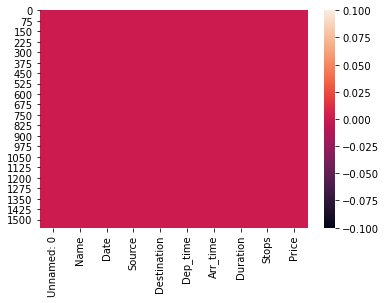

In [70]:
#Looking for null values if any, in heatmap
sns.heatmap(df.isnull()) 

In [71]:
# Lets split the date format
Day=df['Date'].str.split(' ',expand=True)
df["Day"] = Day[0].apply(lambda x: x[:-1]) 
df["Date"] = Day[1].apply(lambda x: x[0:])
df["Month"] = Day[2].apply(lambda x: x[0:])

In [72]:
df.head()

,Unnamed: 0,Name,Date,Source,Destination,Dep_time,Arr_time,Duration,Stops,Price,Day,Month
0,0,Air Asia,27,New Delhi,Mumbai,20:00,02:25\n+ 1 day,6h 25m,1 Stop,"5,953",Sat,Nov
1,1,Air Asia,27,New Delhi,Mumbai,20:45,07:15\n+ 1 day,10h 30m,1 Stop,"5,953",Sat,Nov
2,2,Air Asia,27,New Delhi,Mumbai,20:00,07:40\n+ 1 day,11h 40m,1 Stop,"5,953",Sat,Nov
3,3,Air Asia,27,New Delhi,Mumbai,12:40,02:25\n+ 1 day,13h 45m,1 Stop,"5,953",Sat,Nov
4,4,Go First,27,New Delhi,Mumbai,21:10,23:15,2h 05m,Non Stop,"5,954",Sat,Nov


In [73]:
# Similarly we can separate the hour & mins for Departure Time.

# Separating hours
df["Dep_hour"] = pd.to_datetime(df["Dep_time"]).dt.hour

# Separating mins
df["Dep_min"] = pd.to_datetime(df["Dep_time"]).dt.minute

# We can drop the Dep_Time column as it is of no use now
df.drop(["Dep_time"], axis = 1, inplace = True)

In [74]:
df.head()

,Unnamed: 0,Name,Date,Source,Destination,Arr_time,Duration,Stops,Price,Day,Month,Dep_hour,Dep_min
0,0,Air Asia,27,New Delhi,Mumbai,02:25\n+ 1 day,6h 25m,1 Stop,"5,953",Sat,Nov,20,0
1,1,Air Asia,27,New Delhi,Mumbai,07:15\n+ 1 day,10h 30m,1 Stop,"5,953",Sat,Nov,20,45
2,2,Air Asia,27,New Delhi,Mumbai,07:40\n+ 1 day,11h 40m,1 Stop,"5,953",Sat,Nov,20,0
3,3,Air Asia,27,New Delhi,Mumbai,02:25\n+ 1 day,13h 45m,1 Stop,"5,953",Sat,Nov,12,40
4,4,Go First,27,New Delhi,Mumbai,23:15,2h 05m,Non Stop,"5,954",Sat,Nov,21,10


In [75]:
Time=df['Arr_time'].str.split('\n',expand=True)
Time

,0,1
0,02:25,+ 1 day
1,07:15,+ 1 day
2,07:40,+ 1 day
3,02:25,+ 1 day
4,23:15,None
...,...,...
1554,23:05,None
1555,19:15,None
1556,23:05,None
1557,10:55,+ 1 day


In [76]:
# Similarly we can separate the hour & mins for Arrival Time.
# Separating hours
df["Air_hour"] = pd.to_datetime(Time[0]).dt.hour

# Separating mins
df["Air_min"] = pd.to_datetime(Time[0]).dt.minute



    Duration

    If we see in the dataset, duration is basically the diff of arrival & departure time & it is given as string data type. If we could split than it will be again in string format. So we need to split it & add 0 hours & mins.



In [77]:
# same above concept can be applied in small lines of below code
duration=df['Duration'].str.split(' ',expand=True)
duration[1].fillna('0m',inplace=True)
df["Duration_hours"] = duration[0].apply(lambda x: x[:-1]) 
df["Duration_mins"] = duration[1].apply(lambda x: x[:-1])

In [78]:
# We can drop the Airval time column as it is of no use now
df.drop(["Arr_time"], axis = 1, inplace = True)
df.drop('Unnamed: 0', axis = 1, inplace=True)
df.drop('Month', axis = 1, inplace = True)
df.drop(["Duration"], axis = 1, inplace = True)

In [79]:
df.head()

,Name,Date,Source,Destination,Stops,Price,Day,Dep_hour,Dep_min,Air_hour,Air_min,Duration_hours,Duration_mins
0,Air Asia,27,New Delhi,Mumbai,1 Stop,"5,953",Sat,20,0,2,25,6,25
1,Air Asia,27,New Delhi,Mumbai,1 Stop,"5,953",Sat,20,45,7,15,10,30
2,Air Asia,27,New Delhi,Mumbai,1 Stop,"5,953",Sat,20,0,7,40,11,40
3,Air Asia,27,New Delhi,Mumbai,1 Stop,"5,953",Sat,12,40,2,25,13,45
4,Go First,27,New Delhi,Mumbai,Non Stop,"5,954",Sat,21,10,23,15,2,05


In [80]:
df.columns

Index(['Name', 'Date', 'Source', 'Destination', 'Stops', 'Price', 'Day',
       'Dep_hour', 'Dep_min', 'Air_hour', 'Air_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [81]:
#splitting the data into two lists according to numerical and categorical features
Numerical_df = []
Categorical_df = []

for i in df:
    if ((df[i].dtypes=='int64')|(df[i].dtypes=='float')):
        Numerical_df.append(i)
    else:
        Categorical_df.append(i)

In [82]:
Categorical_df

['Name',
 'Date',
 'Source',
 'Destination',
 'Stops',
 'Price',
 'Day',
 'Duration_hours',
 'Duration_mins']

In [83]:
df['Price'] = df['Price'].str.replace(',','')

In [84]:
df['Date']=df['Date'].astype(int)
df['Duration_hours']=df['Duration_hours'].astype(int)
df['Duration_mins']=df['Duration_mins'].astype(int)
df['Price']=df['Price'].astype(int)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            1559 non-null   object
 1   Date            1559 non-null   int32 
 2   Source          1559 non-null   object
 3   Destination     1559 non-null   object
 4   Stops           1559 non-null   object
 5   Price           1559 non-null   int32 
 6   Day             1559 non-null   object
 7   Dep_hour        1559 non-null   int64 
 8   Dep_min         1559 non-null   int64 
 9   Air_hour        1559 non-null   int64 
 10  Air_min         1559 non-null   int64 
 11  Duration_hours  1559 non-null   int32 
 12  Duration_mins   1559 non-null   int32 
dtypes: int32(4), int64(4), object(5)
memory usage: 134.1+ KB


In [86]:
df.isnull().sum()

Name              0
Date              0
Source            0
Destination       0
Stops             0
Price             0
Day               0
Dep_hour          0
Dep_min           0
Air_hour          0
Air_min           0
Duration_hours    0
Duration_mins     0
dtype: int64

In [87]:
df.shape

(1559, 13)

### DATA VISUALIZATION

Vistara      550
IndiGo       376
Air India    260
Go First     182
Air Asia     109
SpiceJet      82
Name: Name, dtype: int64

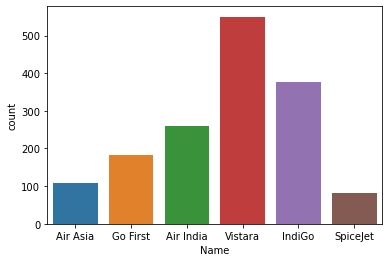

In [88]:
# count of the values based on LOCATION.
sns.countplot(df['Name'])
df['Name'].value_counts()

<AxesSubplot:ylabel='Name'>

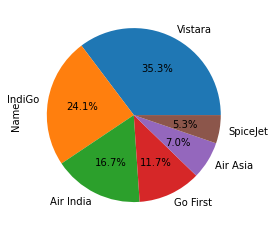

In [89]:
df['Name'].value_counts().plot.pie(autopct='%1.1f%%')

    Vistara is higher and lowest is Spicejet.  
    AirIndia and Indigo has comparable, followed by GoFirst.

New Delhi    1019
Mumbai        540
Name: Source, dtype: int64

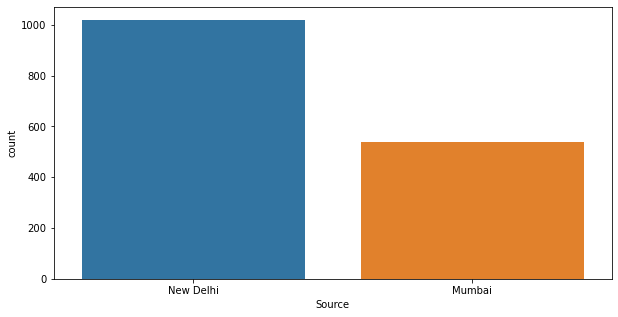

In [90]:
plt.figure(figsize = (10,5))
sns.countplot(df['Source'])
df['Source'].value_counts()

Mumbai       619
Bangalore    530
Chennai      334
Ahmedabad     76
Name: Destination, dtype: int64

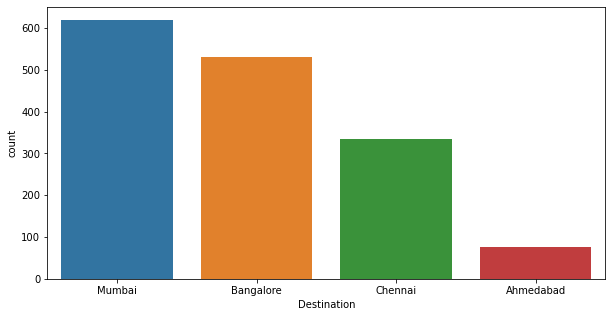

In [91]:
plt.figure(figsize = (10,5))
sns.countplot(df['Destination'])
df['Destination'].value_counts()

1 Stop       1024
Non Stop      357
2 Stop(s)     177
3 Stop(s)       1
Name: Stops, dtype: int64

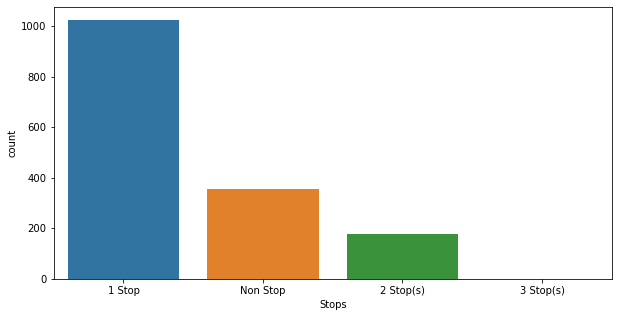

In [92]:
plt.figure(figsize = (10,5))
sns.countplot(df['Stops'])
df['Stops'].value_counts()

**CHECKING FOR OUTLIERS**

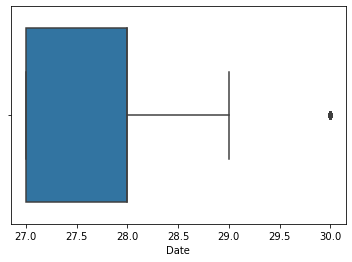

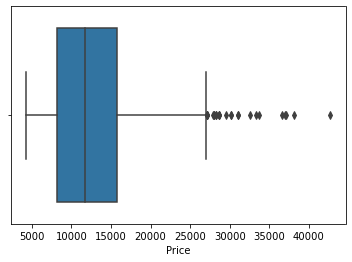

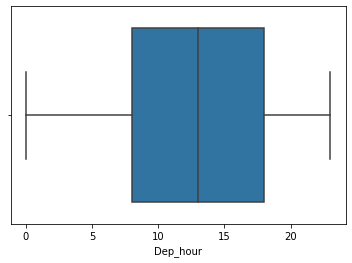

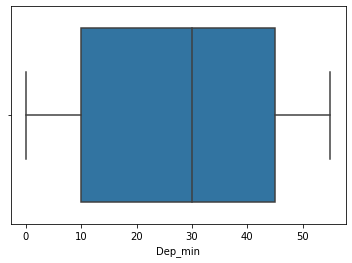

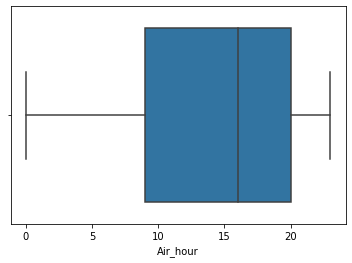

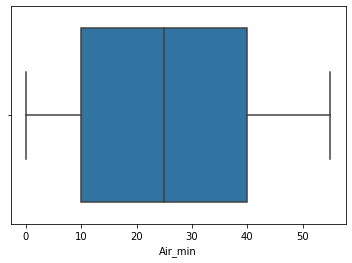

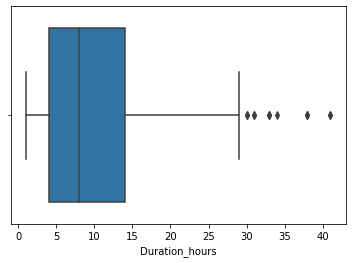

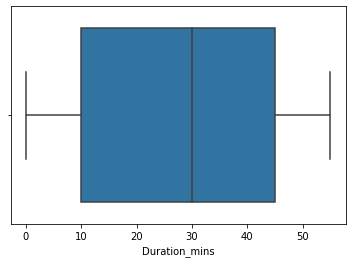

In [93]:
# Cheacking whether the columns has outliers or not
for i in df.describe().columns:
    sns.boxplot(df[i])
    plt.show()

**CHECKING SKEWNESS**

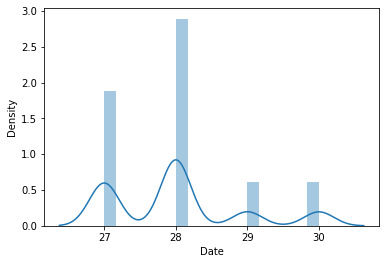

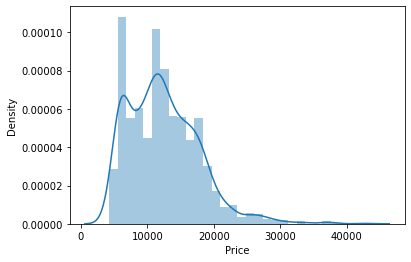

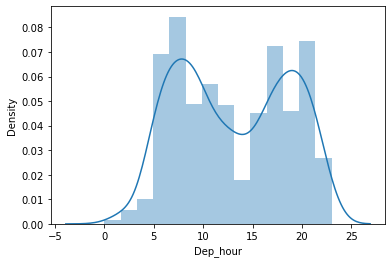

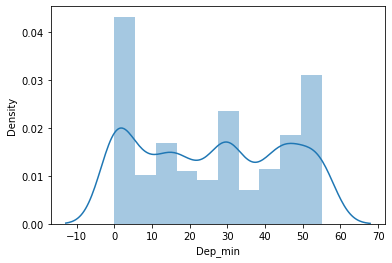

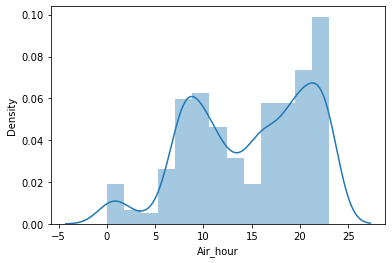

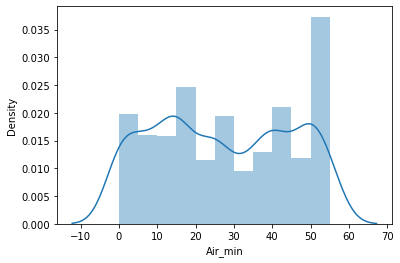

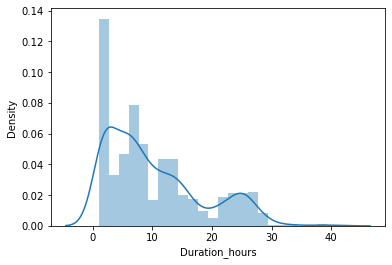

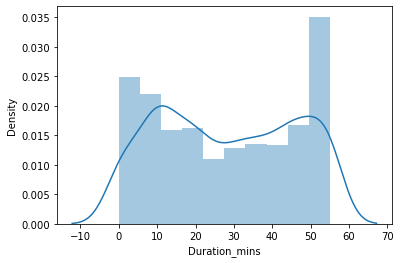

In [94]:
#checking wheather the columns are normally distributed or not

for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

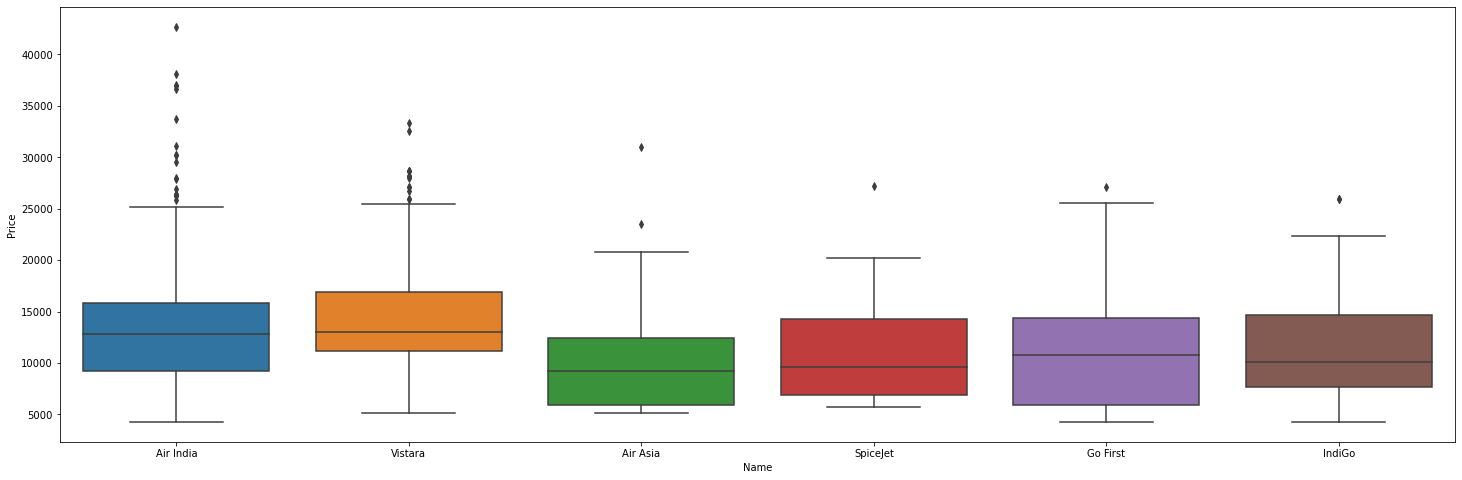

In [95]:
# Airine vs price
plt.figure(figsize=(25,8))
sns.boxplot(y='Price',x='Name',data= df.sort_values('Price',ascending=False))
plt.show

<AxesSubplot:xlabel='Name', ylabel='Price'>

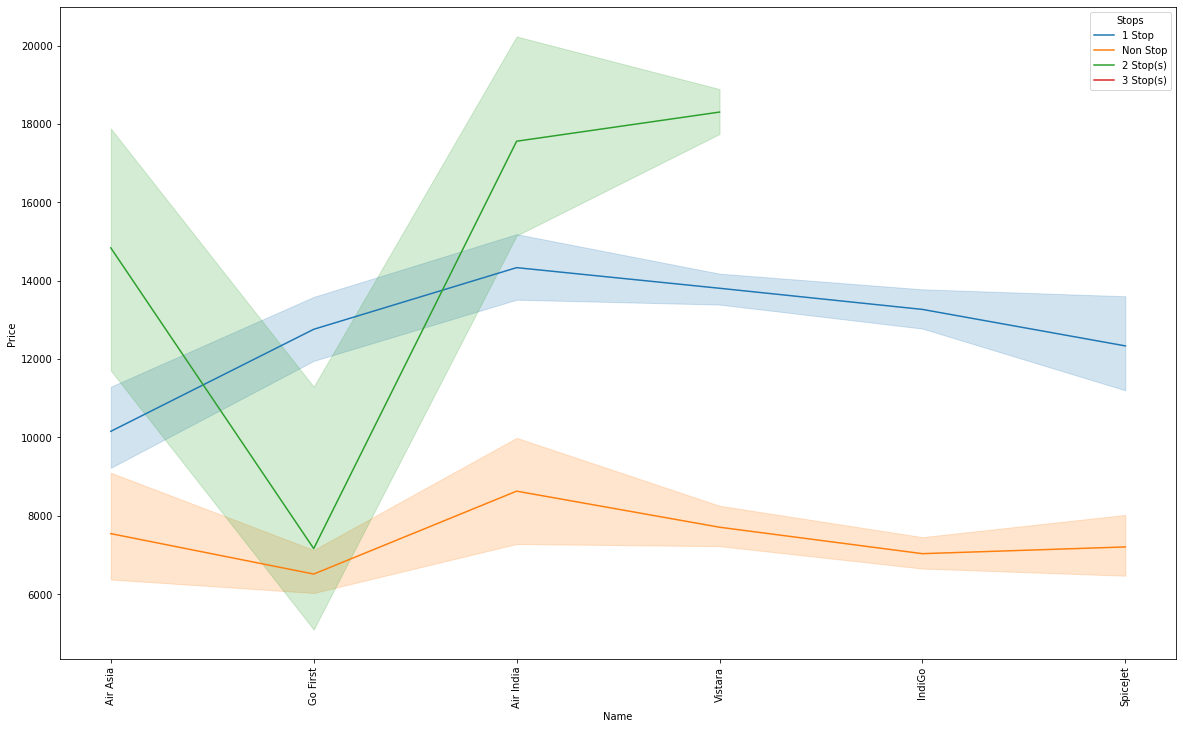

In [96]:
fig = plt.figure(figsize = (20,12))
plt.xticks(rotation = 90)
sns.lineplot(data = df, x ='Name',y ='Price',hue = 'Stops')

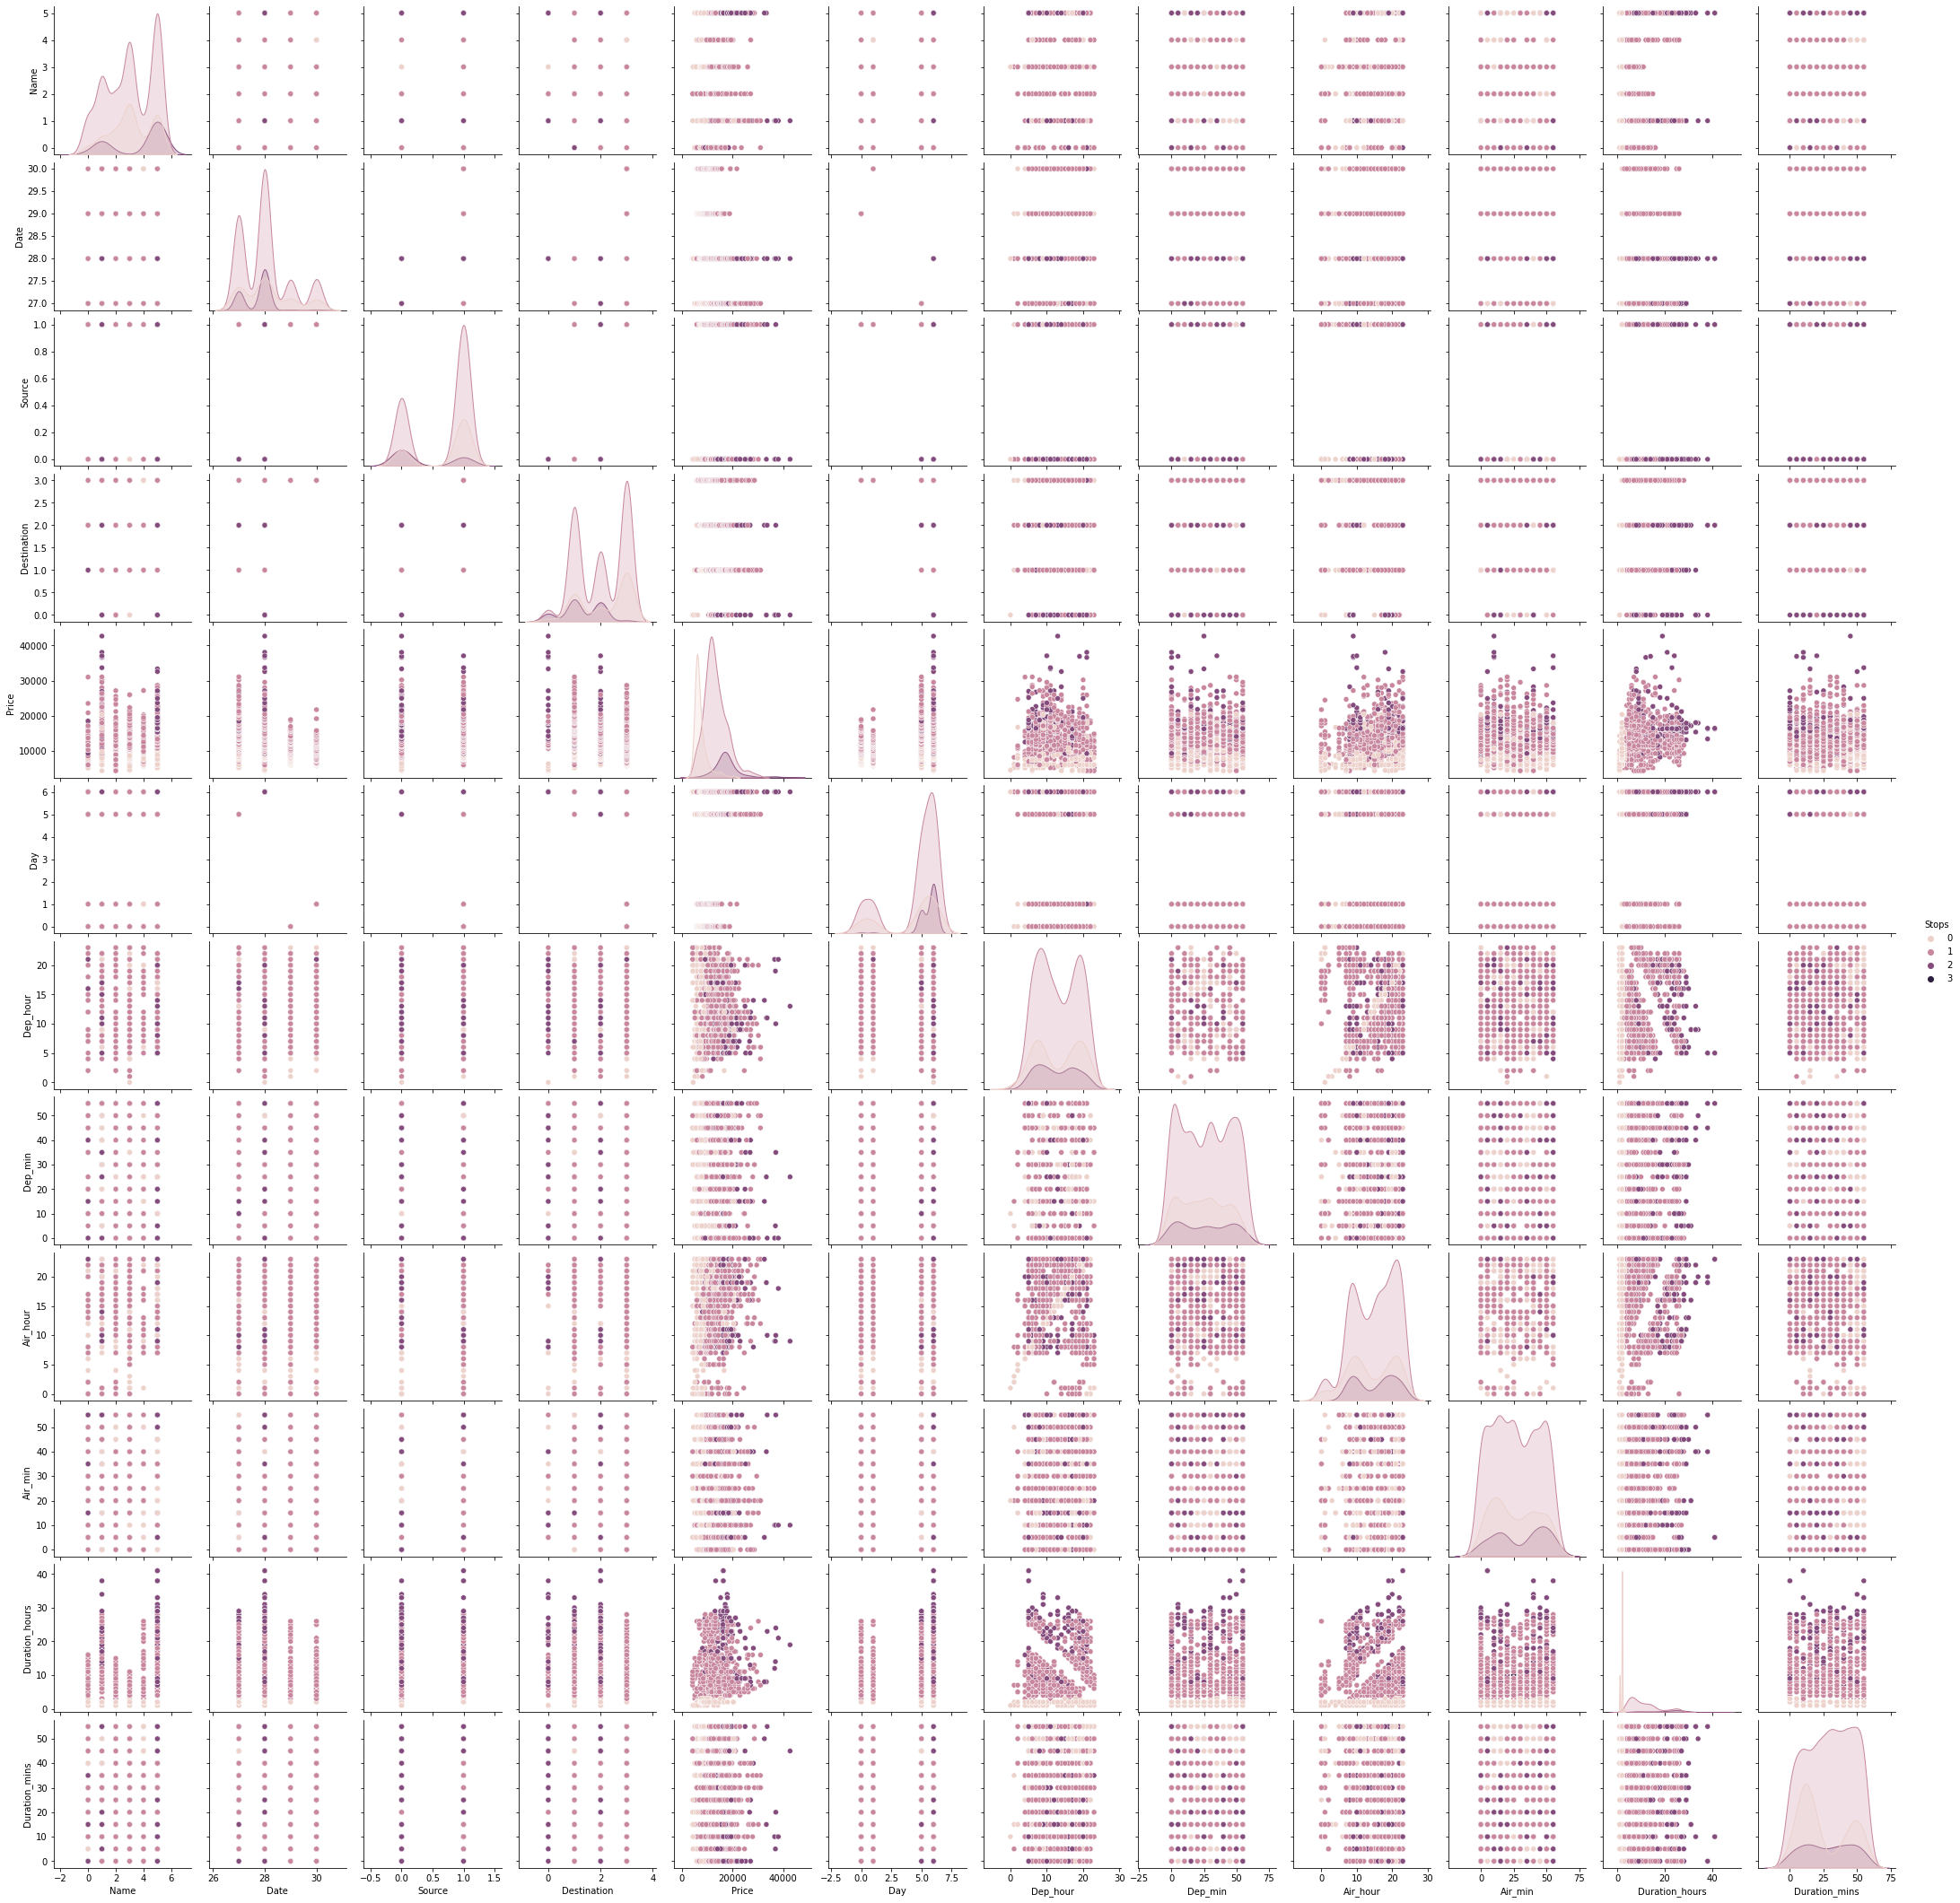

In [151]:
sns.pairplot(df,hue = )

Destination
Ahmedabad    14375.868421
Bangalore    13411.324528
Chennai      12401.380240
Mumbai       11332.003231
Name: Price, dtype: float64

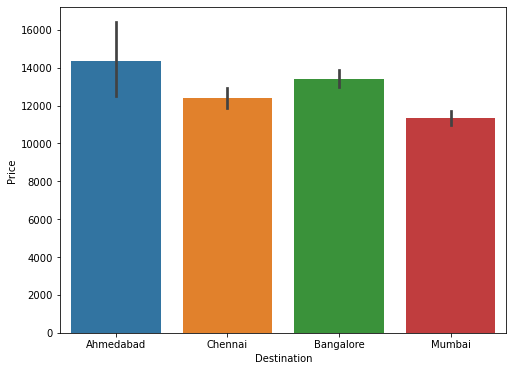

In [97]:
# Destination Vs Price
plt.figure(figsize=(8,6))
sns.barplot(y='Price',x='Destination',data=df.sort_values("Price", ascending = False))
plt.show
df.groupby('Destination')['Price'].mean().sort_values(ascending=False)

    Maximum destination is kolkata having highest avg fare.

In [98]:
df.groupby(['Name','Stops'])['Price'].mean()

Name       Stops    
Air Asia   1 Stop       10157.282353
           2 Stop(s)    14838.400000
           Non Stop      7546.789474
Air India  1 Stop       14333.831395
           2 Stop(s)    17559.574468
           3 Stop(s)     9590.000000
           Non Stop      8630.700000
Go First   1 Stop       12760.777778
           2 Stop(s)     7165.000000
           Non Stop      6515.547170
IndiGo     1 Stop       13267.897638
           Non Stop      7035.606557
SpiceJet   1 Stop       12337.086207
           Non Stop      7207.416667
Vistara    1 Stop       13807.696049
           2 Stop(s)    18303.295082
           Non Stop      7710.323232
Name: Price, dtype: float64

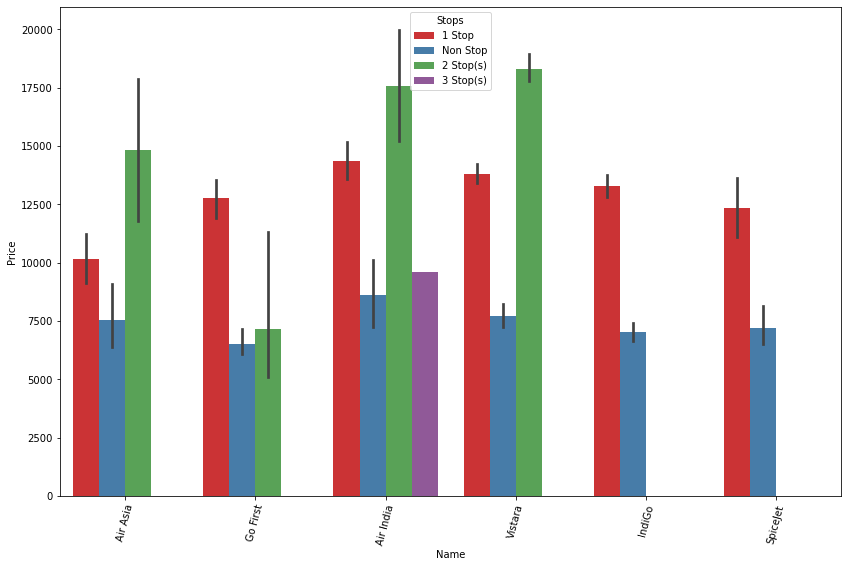

In [99]:
plt.figure(figsize=(14,9))
ax=sns.barplot(x=df['Name'],y=df['Price'],hue=df['Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=75)
plt.show()

In [100]:
# performing label encoder as the column is in ordinal category
df.replace({"Non Stop": 0, "1 Stop": 1, "2 Stop(s)": 2, "3 Stop(s)": 3}, inplace = True)

In [101]:
df["Day"].value_counts()

Sun    752
Sat    488
Mon    160
Tue    159
Name: Day, dtype: int64

In [102]:
# performing label encoder as the column is in ordinal category
df.replace({"Mon": 0, "Tue": 1, "Wed": 2, "Thu": 3, "Fri": 4, "Sat":5, "Sun": 6}, inplace = True)

In [111]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var = ['Name','Source','Destination']
for i in var:
    df[i] = le.fit_transform(df[i])

### HeatMap 

<AxesSubplot:>

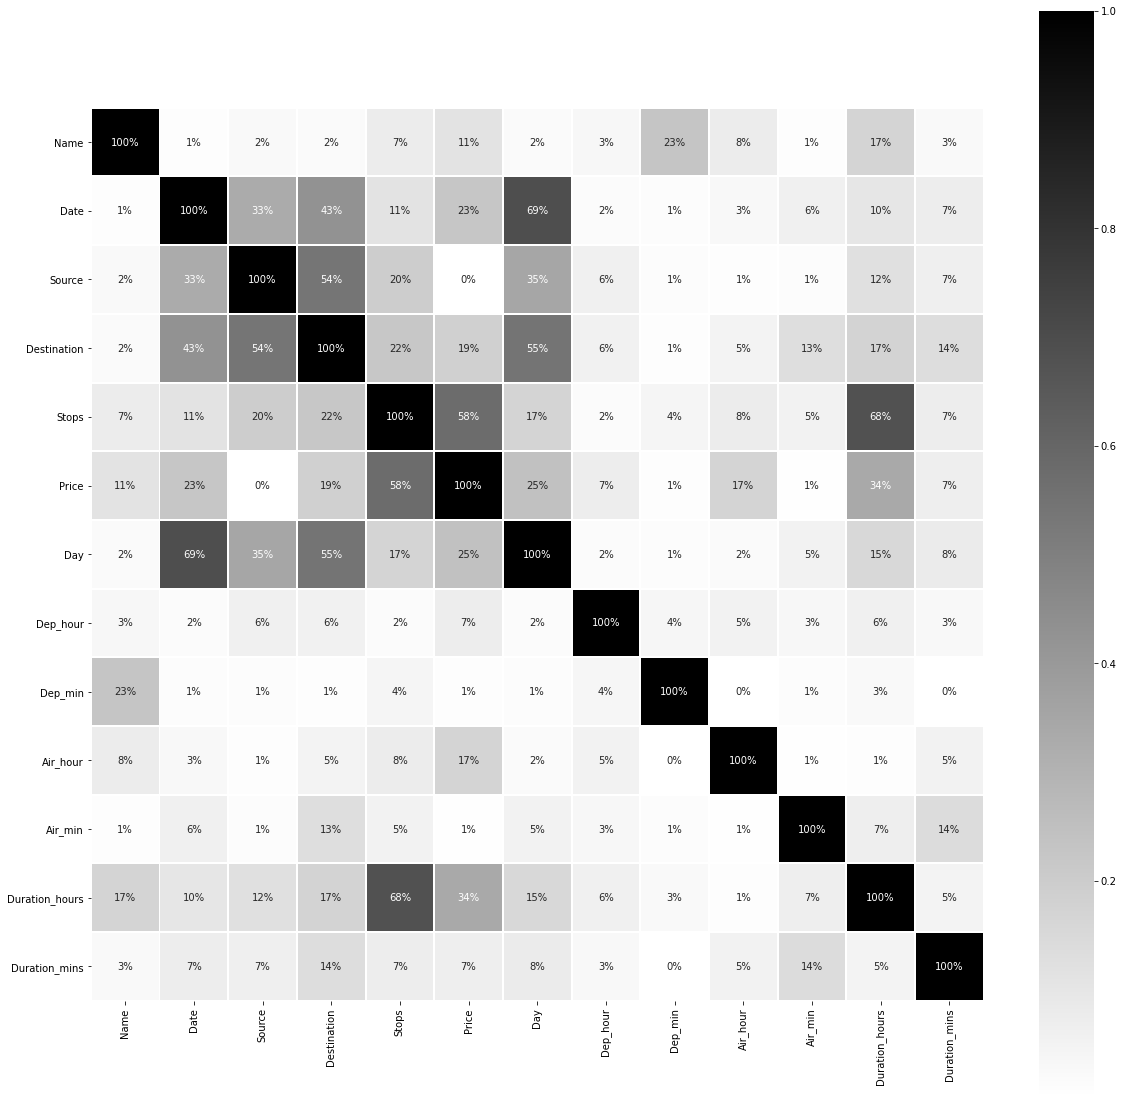

In [112]:
df_corr = df.corr().abs()
plt.figure(figsize = (20,20))
sns.heatmap(df_corr, annot = True,square = True,
           fmt='.0%', linewidth = 1,cmap = 'binary')

    Total stops is more corelated with target variable.
    Multi colinearity: Date & Source, Date.

In [113]:
df_corr

,Name,Date,Source,Destination,Stops,Price,Day,Dep_hour,Dep_min,Air_hour,Air_min,Duration_hours,Duration_mins
Name,1.000000,0.009608,0.024677,0.021279,0.074592,0.111068,0.020051,0.034125,0.230095,0.075617,0.011779,0.170813,0.027218
Date,0.009608,1.000000,0.329088,0.429848,0.111793,0.225578,0.692811,0.019561,0.012225,0.031152,0.062258,0.101219,0.072126
Source,0.024677,0.329088,1.000000,0.542523,0.198044,0.000326,0.351232,0.062230,0.013117,0.010462,0.012051,0.121651,0.066239
Destination,0.021279,0.429848,0.542523,1.000000,0.219489,0.187230,0.545175,0.056494,0.011981,0.049792,0.132006,0.174211,0.135898
Stops,0.074592,0.111793,0.198044,0.219489,1.000000,0.576937,0.171253,0.015961,0.042664,0.075135,0.051486,0.683096,0.072316
Price,0.111068,0.225578,0.000326,0.187230,0.576937,1.000000,0.245411,0.071826,0.008665,0.168274,0.007952,0.339247,0.068188
Day,0.020051,0.692811,0.351232,0.545175,0.171253,0.245411,1.000000,0.016868,0.012941,0.022635,0.053755,0.152893,0.080180
Dep_hour,0.034125,0.019561,0.062230,0.056494,0.015961,0.071826,0.016868,1.000000,0.037181,0.054588,0.033087,0.062519,0.030243
Dep_min,0.230095,0.012225,0.013117,0.011981,0.042664,0.008665,0.012941,0.037181,1.000000,0.003715,0.014374,0.027219,0.001206
Air_hour,0.075617,0.031152,0.010462,0.049792,0.075135,0.168274,0.022635,0.054588,0.003715,1.000000,0.006786,0.009272,0.051614


In [114]:
df.skew()

Name             -0.269851
Date              0.832183
Source           -0.646353
Destination      -0.245443
Stops             0.025632
Price             0.998506
Day              -1.356528
Dep_hour          0.029135
Dep_min           0.039548
Air_hour         -0.365933
Air_min           0.045523
Duration_hours    0.922306
Duration_mins     0.026732
dtype: float64

In [115]:
#finding boundary values
print('Highest allowed',df['Duration_hours'].mean()+3*df['Duration_hours'].std())

Highest allowed 34.3411883905776


### MODEL BUILDING

In [117]:
#SPLITTING AS TEST AND TRAIN DATA.
x=df.drop('Price', axis=1)
y=df['Price']

In [123]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [124]:
from sklearn.ensemble import RandomForestRegressor
maxr2score = 0
maxRS = 0

for i in range (1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = i)
    RF = RandomForestRegressor()
    RF.fit(x_train, y_train)
    predrf = RF.predict(x_test)
    r2 = r2_score(y_test, predrf)
    if r2>maxr2score:
        maxr2score = r2
        maxRS = i
print ('Max R2 score obtained is', maxr2score, 'on Random State', maxRS)

Max R2 score obtained is 0.7259001171360656 on Random State 44


In [125]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = maxRS)

R2_score of Random Forest: 0.6230450659888401
MAE: 2186.085128205128
MSE: 11645040.081005698
RMSE: 3412.482978859484


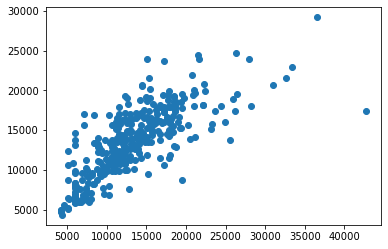

In [126]:
#Applying BaggingRegressor
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor()
br.fit(x_train,y_train)
predbr = br.predict(x_test)
BRR = r2_score(y_test,predbr)
print('R2_score of Random Forest:',BRR)
print('MAE:', metrics.mean_absolute_error(y_test, predbr))
print('MSE:', metrics.mean_squared_error(y_test, predbr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predbr)))
plt.scatter(x=y_test,y=predbr)

R2_score of Random Forest: 0.6619606949198916
MAE: 2041.1504268213268
MSE: 10442843.166224835
RMSE: 3231.538823258176


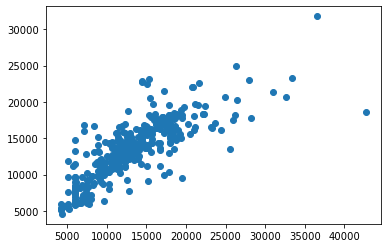

In [135]:
#Applying RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
RFR = r2_score(y_test,predrf)
print('R2_score of Random Forest:',RFR)
print('MAE:', metrics.mean_absolute_error(y_test, predrf))
print('MSE:', metrics.mean_squared_error(y_test, predrf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predrf)))
plt.scatter(x=y_test,y=predrf)

R2_score of KNN : 0.5073223607468256
MAE: 2615.109230769231
MSE: 15219991.406051284
RMSE: 3901.280739199793


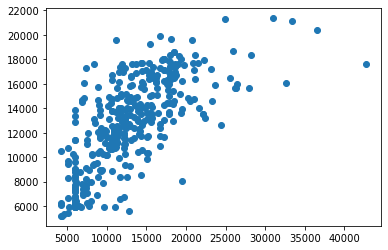

In [128]:
#Applying KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 5)
KNN.fit(x_train,y_train)
predknn = KNN.predict(x_test)
KNNR = r2_score(y_test,predknn)
print('R2_score of KNN :',KNNR)
print('MAE:', metrics.mean_absolute_error(y_test, predknn))
print('MSE:', metrics.mean_squared_error(y_test, predknn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predknn)))
plt.scatter(x=y_test,y=predknn)

R2_score of GB : 0.6158109541408174
MAE: 2336.663872271142
MSE: 11868519.109451598
RMSE: 3445.071713252367


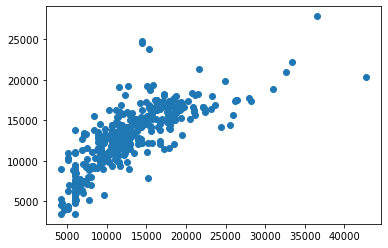

In [129]:
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)
predgb = GB.predict(x_test)
GBR = r2_score(y_test,predgb)
print('R2_score of GB :',GBR)
print('MAE:', metrics.mean_absolute_error(y_test, predgb))
print('MSE:', metrics.mean_squared_error(y_test, predgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predgb)))
plt.scatter(x=y_test,y=predgb)


R2_score of DT: 0.3051811522399246
MAE: 2634.905128205128
MSE: 21464617.123076923
RMSE: 4632.992242932954


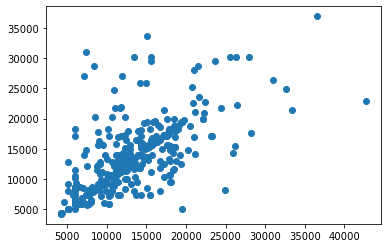

In [130]:
#Applying DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
DTR = r2_score(y_test,preddt)
print('R2_score of DT:',DTR)
print('MAE:', metrics.mean_absolute_error(y_test, preddt))
print('MSE:', metrics.mean_squared_error(y_test, preddt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preddt)))
plt.scatter(x=y_test,y=preddt)

    RandomForestRegressor is giving best result out of other model. Lets check its test & train score.

### Hyper Parameter Tuning 

In [134]:
# RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
RF.score(x_train, y_train)

0.9463969941987098

In [141]:
RF.score(x_test, y_test)

0.6603541680178843

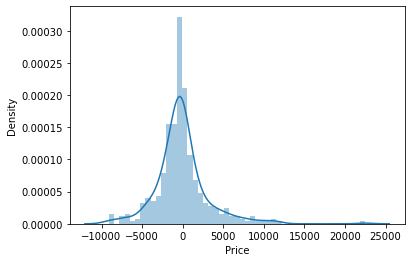

In [142]:
sns.distplot(y_test-y_pred)
plt.show()

In [143]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.6603541680178843

    Since RandomForestRegressor is the best model in terms of model score, cross validation difference, test & train r2 score difference, also as per the evaluation metrics, we choose RandomForestRegressor to be the final model. Lets see if we can increase the score by using hyper parameter tuning.

### Hyper Parameter Tuning

In [144]:
params = {'n_estimators': range(50,200,10),
               'max_features': ['auto', 'sqrt'],
               'max_depth': range(5,30,6),
               'min_samples_split': [2, 5, 10, 15, 100],
               'min_samples_leaf': [1, 2, 5, 10]}

In [145]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomizedSearchCV(RandomForestRegressor(),params,scoring='neg_mean_squared_error',n_iter = 10,cv=5, n_jobs= -1,random_state=42)
rf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': range(5, 30, 6),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': range(50, 200, 10)},
                   random_state=42, scoring='neg_mean_squared_error')

In [146]:
rf.best_params_

{'n_estimators': 90,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 17}

In [147]:
pred = rf.predict(x_test)
print(r2_score(y_test,pred))

0.6480629736403024


R2_score of Random Forest: 0.6480835949125017
MAE: 2110.4627357120066
MSE: 10871539.997632796
RMSE: 3297.2018436293515


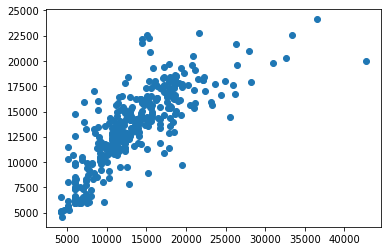

In [149]:
#Applying RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 90 , min_samples_split = 5, min_samples_leaf = 2, max_features = 'auto', max_depth = 17)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
RFR = r2_score(y_test,predrf)
print('R2_score of Random Forest:',RFR)
print('MAE:', metrics.mean_absolute_error(y_test, predrf))
print('MSE:', metrics.mean_squared_error(y_test, predrf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predrf)))
plt.scatter(x=y_test,y=predrf)

In [150]:
import joblib
joblib.dump(rf,'Flight_Price_Prediction_Project.pkl')

['Flight_Price_Prediction_Project.pkl']